In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
print(mnist_train_images.shape)
print(mnist_train_labels.shape)
print(mnist_test_images.shape)
print(mnist_test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

In [4]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


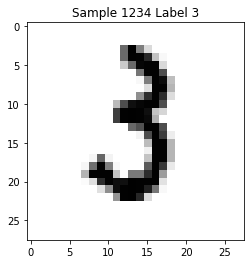

In [5]:
import matplotlib.pyplot as plt

def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28, 28])
    plt.title('Sample %d Label %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

display_sample(1234)

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [9]:
model_ = model.fit(train_images, train_labels, batch_size=100, epochs=10, verbose=2, validation_data=(test_images, test_labels))

Epoch 1/10
600/600 - 10s - loss: 0.2337 - accuracy: 0.9289 - val_loss: 0.1113 - val_accuracy: 0.9646
Epoch 2/10
600/600 - 9s - loss: 0.1039 - accuracy: 0.9693 - val_loss: 0.0815 - val_accuracy: 0.9742
Epoch 3/10
600/600 - 10s - loss: 0.0776 - accuracy: 0.9766 - val_loss: 0.0770 - val_accuracy: 0.9766
Epoch 4/10
600/600 - 11s - loss: 0.0637 - accuracy: 0.9819 - val_loss: 0.0807 - val_accuracy: 0.9786
Epoch 5/10
600/600 - 13s - loss: 0.0546 - accuracy: 0.9841 - val_loss: 0.0767 - val_accuracy: 0.9784
Epoch 6/10
600/600 - 11s - loss: 0.0478 - accuracy: 0.9861 - val_loss: 0.0785 - val_accuracy: 0.9812
Epoch 7/10
600/600 - 11s - loss: 0.0415 - accuracy: 0.9875 - val_loss: 0.0796 - val_accuracy: 0.9823
Epoch 8/10
600/600 - 12s - loss: 0.0400 - accuracy: 0.9885 - val_loss: 0.0889 - val_accuracy: 0.9806
Epoch 9/10
600/600 - 11s - loss: 0.0355 - accuracy: 0.9899 - val_loss: 0.0958 - val_accuracy: 0.9798
Epoch 10/10
600/600 - 11s - loss: 0.0358 - accuracy: 0.9904 - val_loss: 0.1092 - val_accurac

In [10]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss :: ', score[0], '   Test accuracy :: ', score[1])

Test loss ::  0.10920019447803497    Test accuracy ::  0.9800000190734863


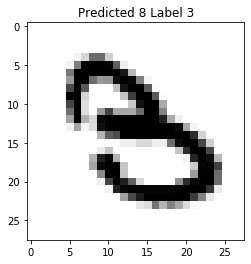

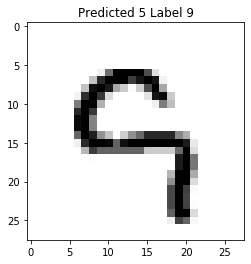

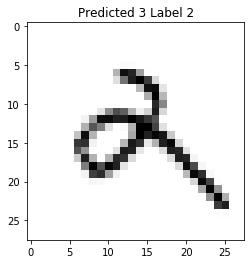

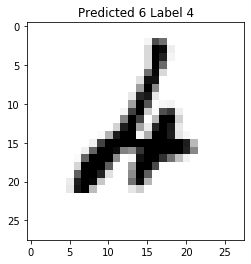

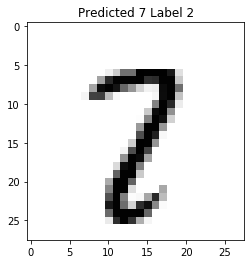

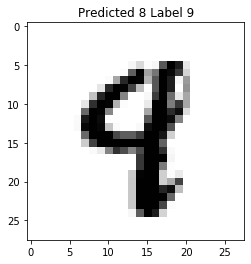

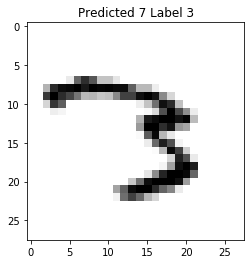

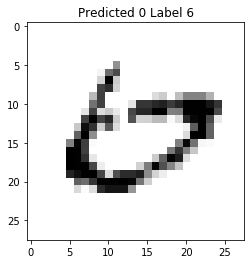

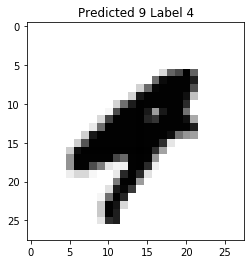

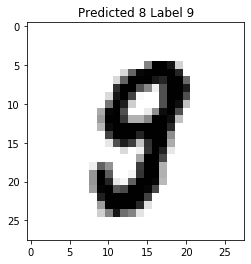

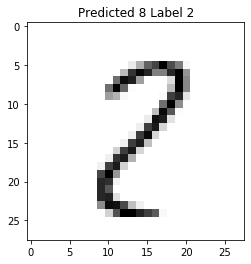

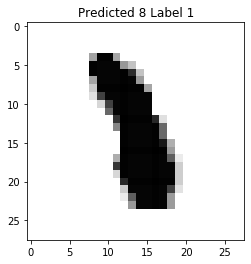

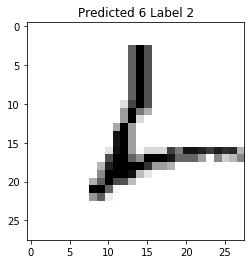

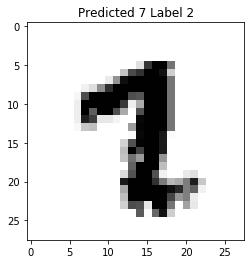

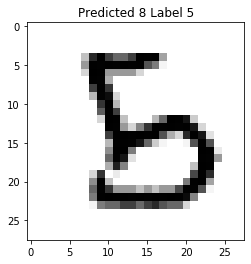

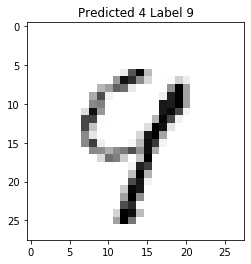

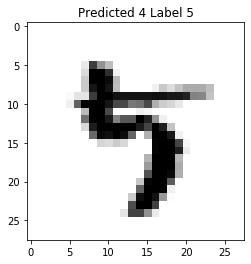

In [11]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1, 784)
    predicted = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted != label):
        plt.title('Predicted %d Label %d' % (predicted, label))
        plt.imshow(test_image.reshape([28, 28]), cmap=plt.get_cmap('gray_r'))
        plt.show()